<a href="https://colab.research.google.com/github/arwakhalidw/2024-GP-Group6/blob/main/AlzheimerPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
# @title Import Required Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
import matplotlib.pyplot as plt
from scipy.stats import zscore
import scipy.stats as stats

In [4]:
# @title Reading and Copying the Dataset
# Read the dataset
dataset = pd.read_csv("alzheimer.csv")
# Copy the dataset
dataframe = dataset.copy() # to keep the original dataset unchanged

There are 10 features, they are as follows:
1.  Group is the Class lable
2.  M/F the gender of the patients
3.  Age is the Age of the patient
4.  EDUC are Years of Education
5.  SES are Socioeconomic Status on a scale from 1 to 5
6.  MMSE is Mini Mental State Examination
7.  CDR is Clinical Dementia Rating
8.  eTIV is Estimated total intracranial volume
9.  nWBV is Normalize Whole Brain Volume
10.  ASF is Atlas Scaling Factor







In [3]:
# @title Check the Data Shape
dataframe.shape

(373, 10)

In [4]:
# @title Display the First 5 Rows
dataframe.head()

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [5]:
# @title Describe the Numeric Values in the Dataset
dataframe.describe()

,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [6]:
# @title Check if Any Column has Null values in the Dataset
dataframe.isnull().any()

Group    False
M/F      False
Age      False
EDUC     False
SES       True
MMSE      True
CDR      False
eTIV     False
nWBV     False
ASF      False
dtype: bool

# Visualization

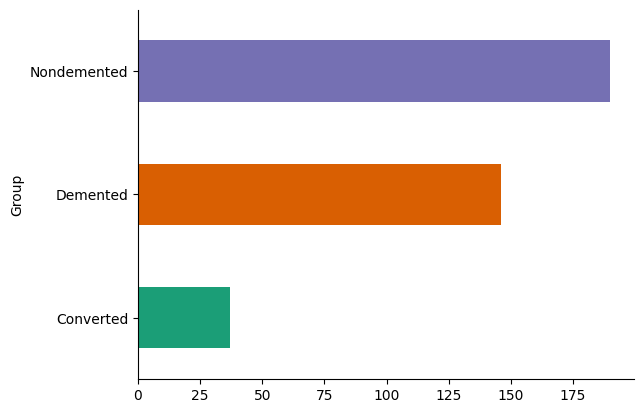

In [51]:
# @title Group

dataframe.groupby('Group').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

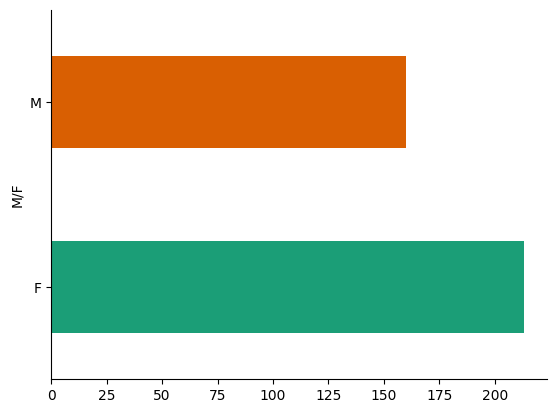

In [25]:
# @title M/F

dataframe.groupby('M/F').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

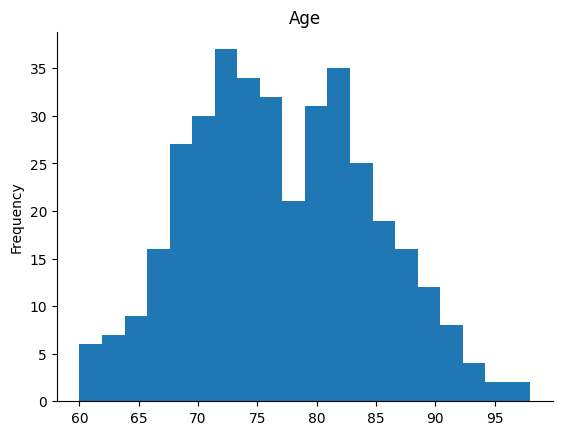

In [26]:
# @title Age

dataframe['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

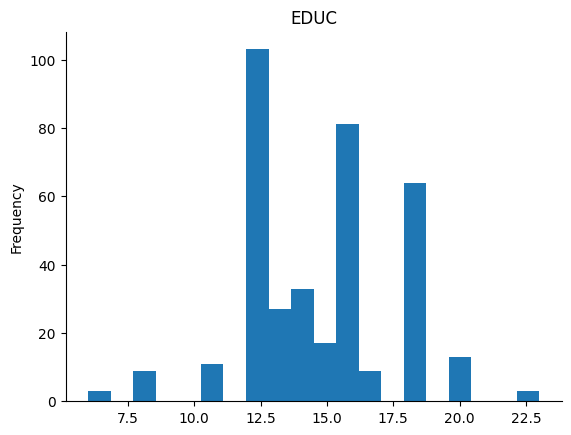

In [27]:
# @title EDUC

dataframe['EDUC'].plot(kind='hist', bins=20, title='EDUC')
plt.gca().spines[['top', 'right',]].set_visible(False)

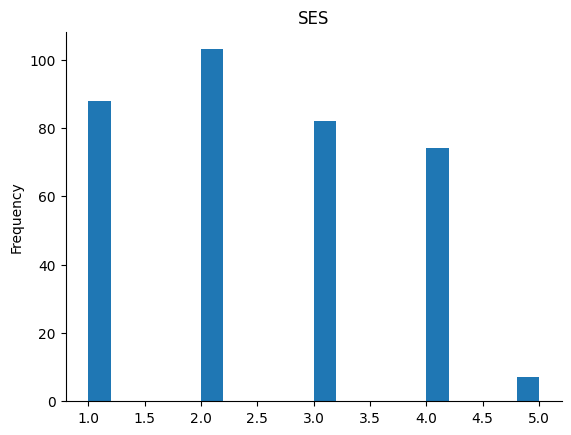

In [28]:
# @title SES

dataframe['SES'].plot(kind='hist', bins=20, title='SES')
plt.gca().spines[['top', 'right',]].set_visible(False)

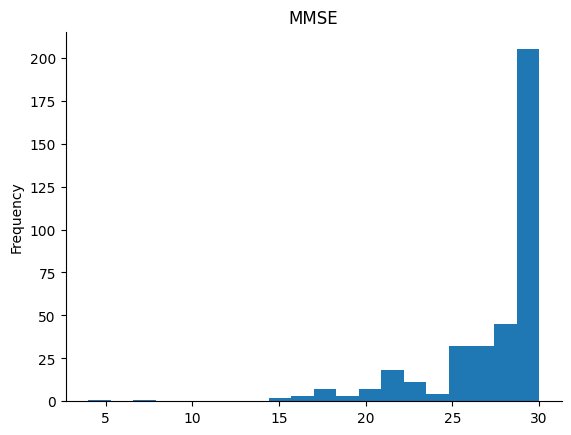

In [29]:
# @title MMSE

dataframe['MMSE'].plot(kind='hist', bins=20, title='MMSE')
plt.gca().spines[['top', 'right',]].set_visible(False)

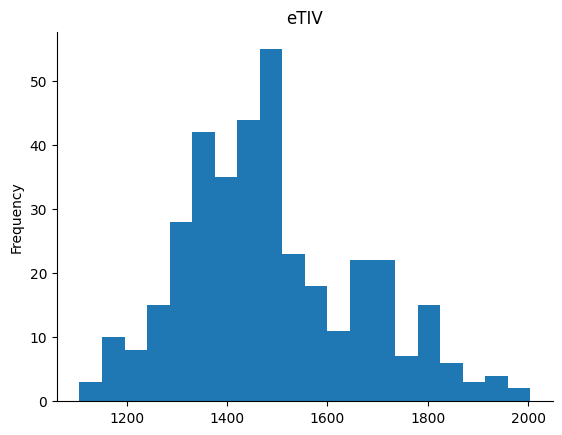

In [30]:
# @title eTIV

dataframe['eTIV'].plot(kind='hist', bins=20, title='eTIV')
plt.gca().spines[['top', 'right',]].set_visible(False)

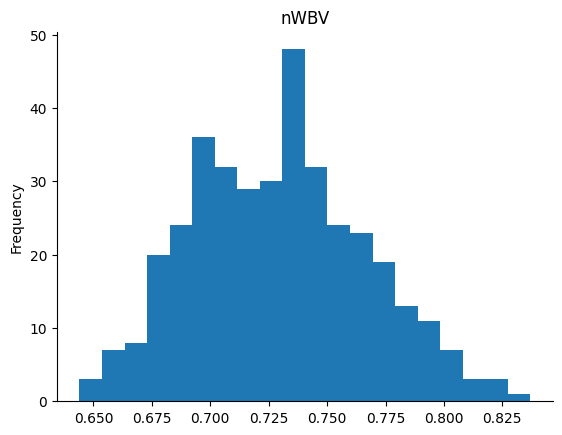

In [31]:
# @title nWBV

dataframe['nWBV'].plot(kind='hist', bins=20, title='nWBV')
plt.gca().spines[['top', 'right',]].set_visible(False)

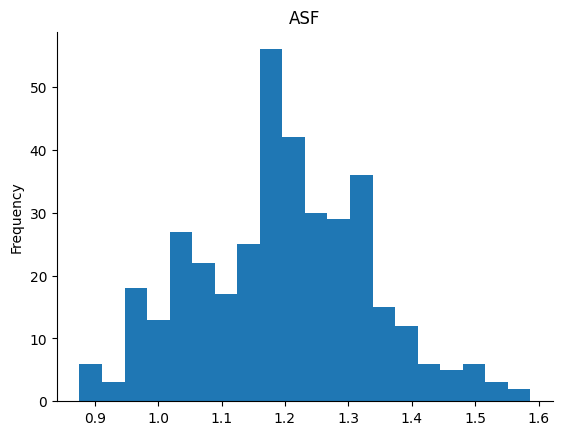

In [32]:
# @title ASF

dataframe['ASF'].plot(kind='hist', bins=20, title='ASF')
plt.gca().spines[['top', 'right',]].set_visible(False)

# Data Cleaning
## Handling Missing Values

As seen before, the SES and MMSE columns contain missing values. First, we'll check whether or not the data for these columns is normally distrubuted using the Shapiro-Wilk test.

In [33]:
stat, p_value = shapiro(dataframe['SES'])

print('Shapiro-Wilk test for SES:')
if p_value < 0.05:
    print("The data is not normally distributed.")
else:
    print("The data appears to be normally distributed.")

stat, p_value = shapiro(dataframe['MMSE'])

print('Shapiro-Wilk test for MMSE:')
if p_value < 0.05:
    print("The data is not normally distributed.")
else:
    print("The data appears to be normally distributed.")


    ## Since the data in both columns is normally distributed, we can either perform median or mean imputation.
dataframe['SES'].fillna(dataframe['SES'].mean(), inplace=True)
dataframe['MMSE'].fillna(dataframe['MMSE'].mean(), inplace=True)




Shapiro-Wilk test for SES:
The data appears to be normally distributed.
Shapiro-Wilk test for MMSE:
The data appears to be normally distributed.


In [34]:
## Since the data in both columns is normally distributed, we can either perform median or mean imputation.
dataframe['SES'].fillna(dataframe['SES'].mean(), inplace=True)
dataframe['MMSE'].fillna(dataframe['MMSE'].mean(), inplace=True)

## Check for missing values again
dataframe.isnull().sum()

Group    0
M/F      0
Age      0
EDUC     0
SES      0
MMSE     0
CDR      0
eTIV     0
nWBV     0
ASF      0
dtype: int64

# Exploratory Dataset

##Univariate Analysis


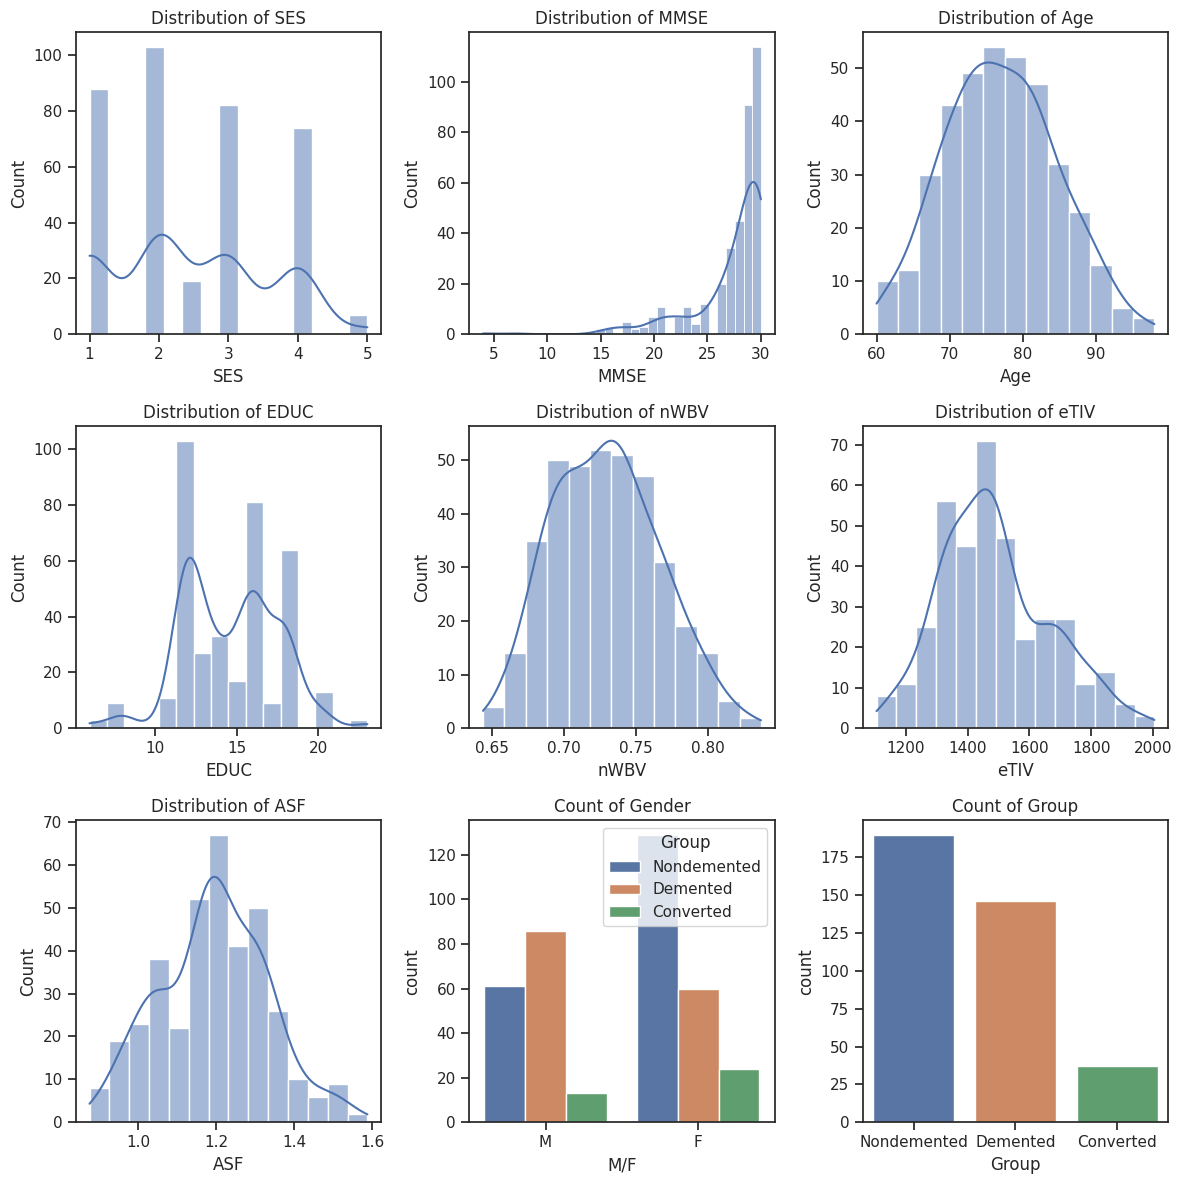

In [67]:
## Numeric Values
numeric_features = ['SES', 'MMSE', 'Age', 'EDUC', 'nWBV', 'eTIV', 'ASF']

plt.figure(figsize=(12, 12))

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(dataframe[feature], kde=True)
    plt.title(f'Distribution of {feature}')

## Categorical Values

plt.subplot(3, 3, 8)
sns.countplot(data=dataframe, x=dataframe['M/F'], hue='Group')
plt.title(f'Count of Gender')

plt.subplot(3, 3, 9)
sns.countplot(data=dataframe, x=dataframe['Group'], hue='Group')
plt.title(f'Count of Group')

# Adjust layout to prevent overlapping of subplots
plt.tight_layout()

# Show plot
plt.show()


 Bivariate Analysis

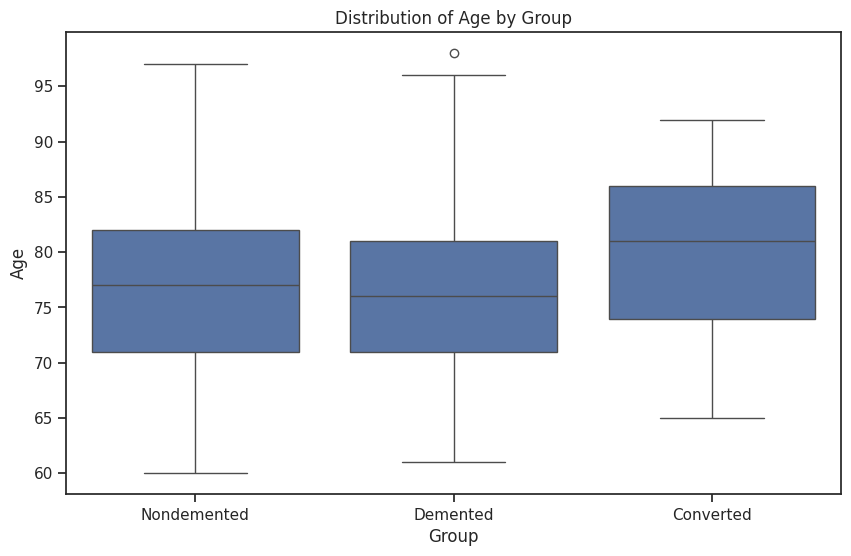

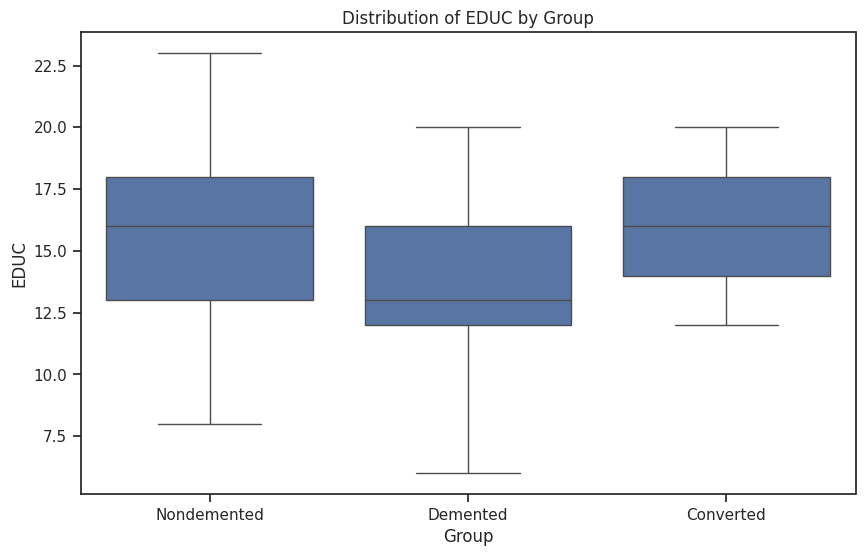

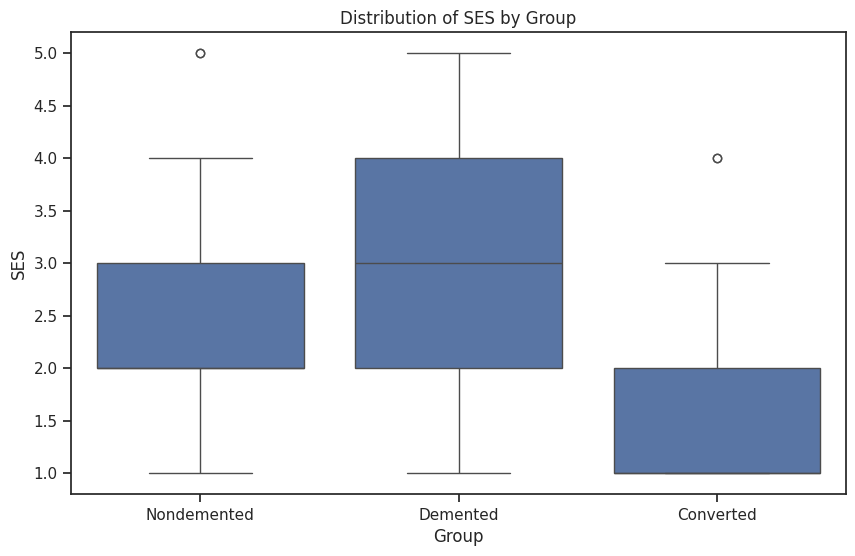

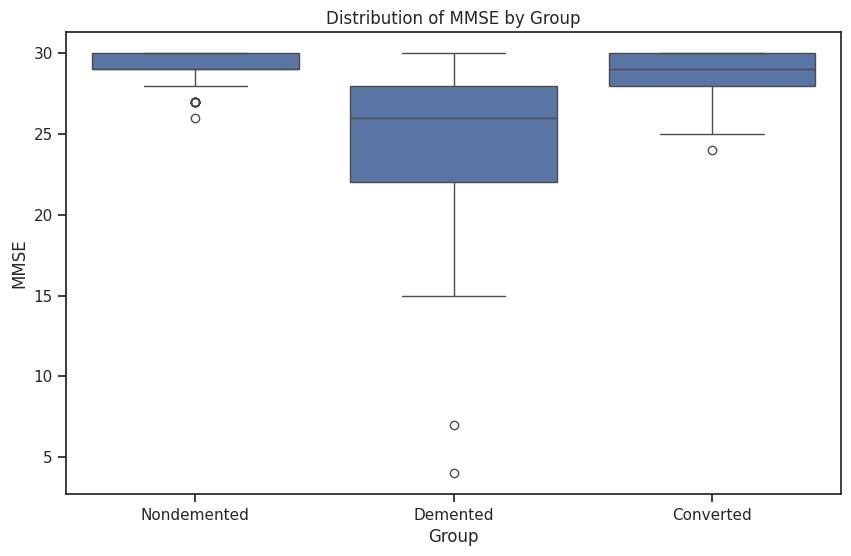

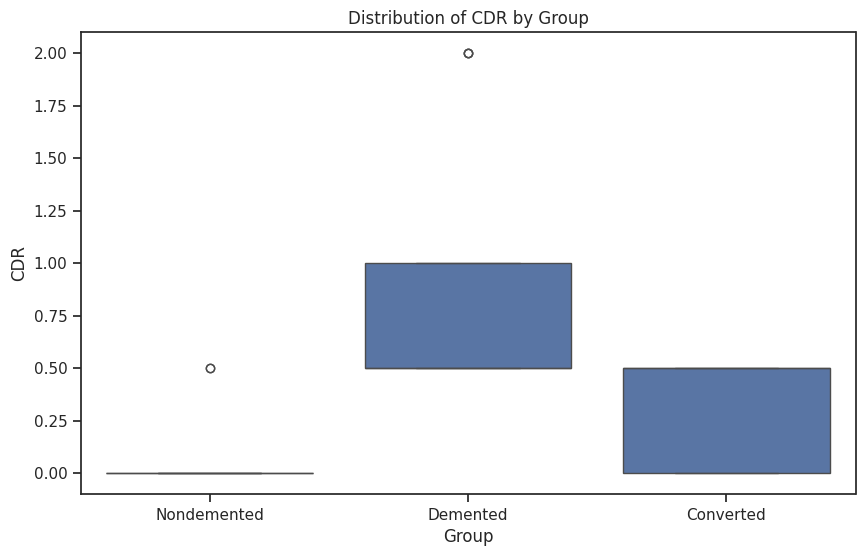

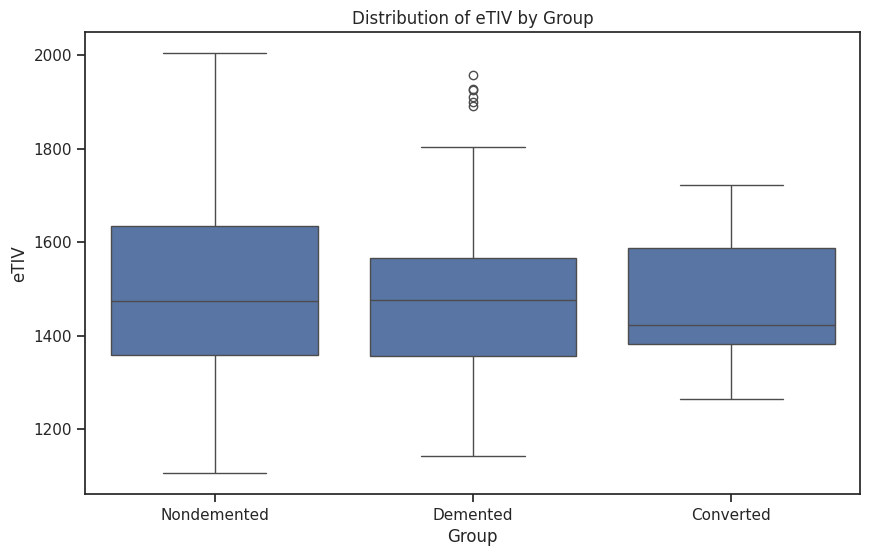

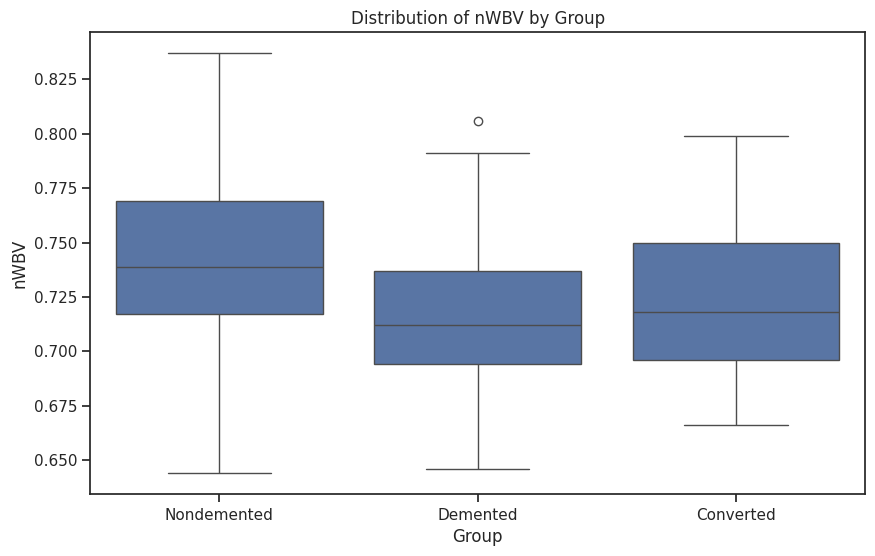

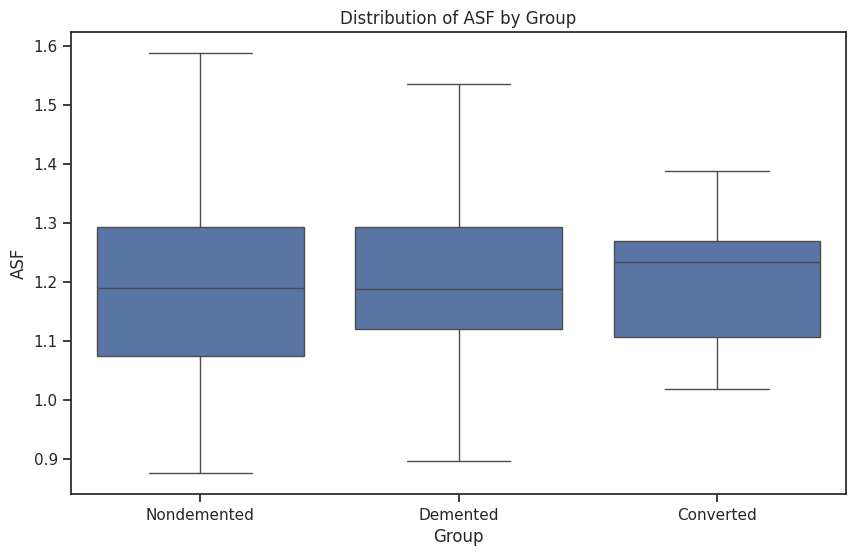

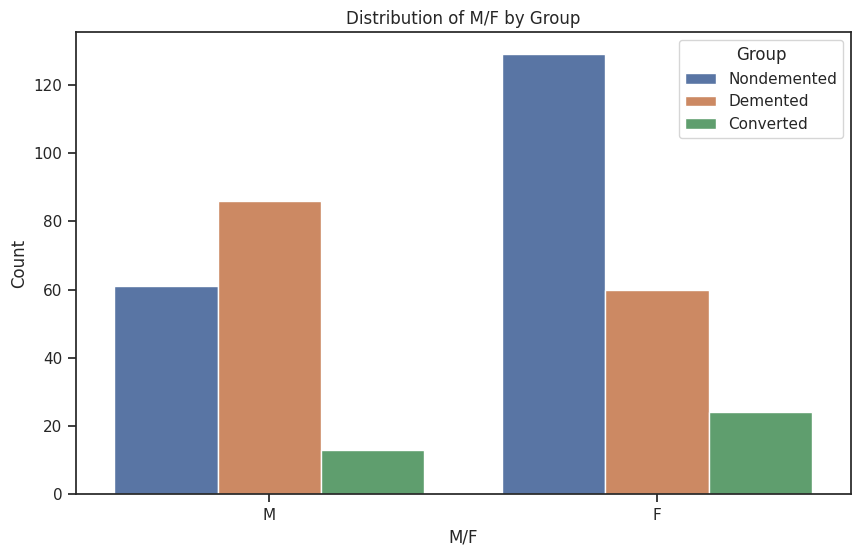

In [68]:
# Select numeric columns (excluding the 'group' column)
numeric_columns = dataset.select_dtypes(include='number').columns

# Plot each numeric column against the 'group' column
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Group', y=column, data=dataset)
    plt.title(f'Distribution of {column} by Group')
    plt.xlabel('Group')
    plt.ylabel(column)
    plt.show()
plt.figure(figsize=(10, 6))
sns.countplot(x='M/F', hue='Group', data=dataset)
plt.title(f'Distribution of M/F by Group')
plt.xlabel('M/F')
plt.ylabel('Count')
plt.legend(title='Group')
plt.show()




Outlier Analysis

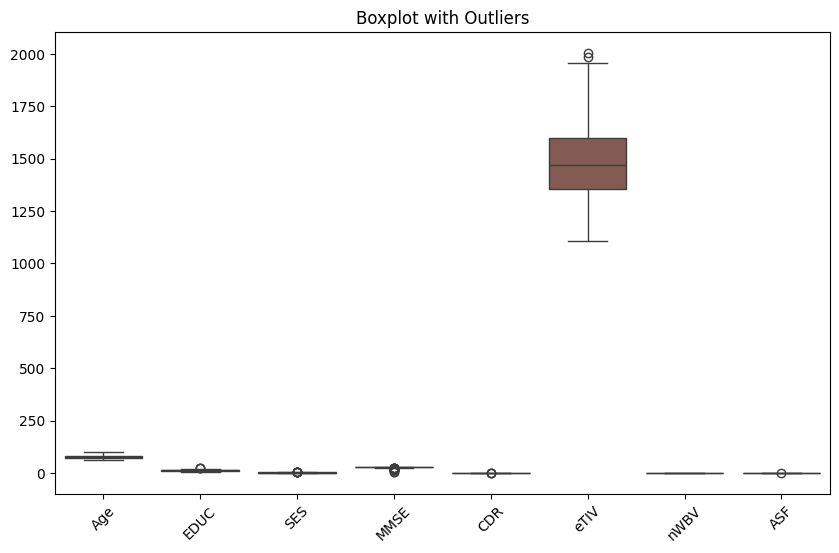

Outliers data:
     CDR  CDR  CDR
184  2.0  2.0  2.0
251  2.0  2.0  2.0
330  2.0  2.0  2.0
Outliers statistics:
       CDR  CDR  CDR
count  3.0  3.0  3.0
mean   2.0  2.0  2.0
std    0.0  0.0  0.0
min    2.0  2.0  2.0
25%    2.0  2.0  2.0
50%    2.0  2.0  2.0
75%    2.0  2.0  2.0
max    2.0  2.0  2.0


In [27]:
# Convert non-numeric columns to numeric or remove them
numeric_data = dataset.select_dtypes(include=['number'])

# Function to detect outliers using z-score
def detect_outliers_zscore(dataset):
    z_scores = np.abs(stats.zscore(dataset))
    threshold = 3
    outliers = np.where(z_scores > threshold)
    return outliers

# Detect outliers
outliers_indices = detect_outliers_zscore(numeric_data)

# Visualize the outliers using boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=numeric_data)
plt.title('Boxplot with Outliers')
plt.xticks(rotation=45)
plt.show()

# Analyze the outliers
outliers_data = numeric_data.iloc[outliers_indices]
print("Outliers data:")
print(outliers_data)

# Further analysis of outliers (e.g., mean, median, quartiles, etc.)
outliers_statistics = outliers_data.describe()
print("Outliers statistics:")
print(outliers_statistics)